# Problem Set-Up

In [1]:
%pylab inline
#plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle
from JSAnimation import IPython_display    
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Setting up blocking rectangle points as [bot. left x, bot. left y, top right x, top right y]
def rectangle_set_up(ax):
    rect1 = [4.,-1.,6.,9.]
    rect2 = [0.5,2.,2.5,5.]
    rect3 = [-6.,-5.,9.,-4.]
    rect4 = [8.,0.,10.,5.]
    rect5 = [-4.,-3.,-2.,5.]
    rect = [rect1,rect2,rect3,rect4,rect5]
    
    # Compute rectangles and add them to ax. Then return the plot
    for i in range(5):
        Rectangles = Rectangle((rect[i][0],rect[i][1]),rect[i][2]-rect[i][0],rect[i][3]-rect[i][1])
        ax.add_patch(Rectangles)

    return ax.plot()

In [3]:
# Straight line trajectories
def point_to_point_traj(x1, x2, v1, v2, delta_t):
    numPts = 50
    t = np.linspace(0, delta_t, numPts)  
    a0 = x1
    a1 = v1
    
    line = a0 + a1*t
    derivative = [a1] * numPts
    return line, derivative

def line2D (X,Y, Vx, Vy, T):
    theta_x, theta_y, dx, dy = [], [], [], []

    for i in range(len(P)-1):          
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i])
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i])

        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi
        dy += dyi

        plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

In [14]:
# Plotting
def plot_points():
    plot(X,Y, '--')
    plot(X,Y, 'o')
    quiver(X,Y, Vx, Vy, color='r')
    
def animate(t):
    ax.clear()
    
    # Obstacles
    rectangle_set_up(ax)
    
    # Path
    ax.plot(theta_x, theta_y, 'b--')
    
    # Initial conditions
    ax.plot(X,Y, 'go')
    ax.quiver(X,Y, Vx, Vy, color='0.4', scale=20)
        
    # Dynamic position
    ax.plot(theta_x[t], theta_y[t], 'ro', markersize=10)
       
    # Velocity vector
    ax.quiver([theta_x[t]], [theta_y[t]], [dx[t]], [dy[t]], color='r', units='xy', scale=10/np.linalg.norm([theta_x[t], theta_y[t]]))


# Straight-Line Trajectory Creation

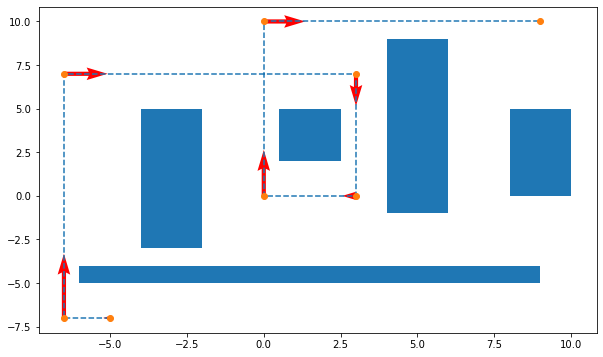

In [5]:
# Waypoints
p1 = [-5.,-7.] # Starting Position
p2 = [-6.5,-7.]
p3 = [-6.5,7.]
p4 = [3.,7.]
p5 = [3.,0.]
p6 = [0.,0.]
p7 = [0.,10.]
p8 = [9.,10.] # Final Position

# Velocities
v0 = [0,0]
v1 = [-1.5,0]
v2 = [0,14]
v3 = [9.5,0]
v4 = [0,-7]
v5 = [-3,0]
v6 = [0,10]
v7 = [9,0]
v8 = [0,0]

# Time
t0 = 0
t1 = 1
t2 = 2
t3 = 3
t4 = 4
t5 = 5
t6 = 6
t7 = 7
t8 = 8

# Convert the initial conditions to a vector form
P = np.vstack((p1, p2, p3, p4, p5, p6, p7, p8))
V = np.vstack((v1, v2, v3, v4, v5, v6, v7, v8))
T = [t0, t1, t2, t3, t4, t5, t6, t7, t8]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]

plot_points()

# Straight-Line Trajectory Computing & Plotting

<ipython-input-14-e2d0f0c3c1f8>:24: RuntimeWarning: divide by zero encountered in double_scalars
  ax.quiver([theta_x[t]], [theta_y[t]], [dx[t]], [dy[t]], color='r', units='xy', scale=10/np.linalg.norm([theta_x[t], theta_y[t]]))
<ipython-input-14-e2d0f0c3c1f8>:24: RuntimeWarning: divide by zero encountered in double_scalars
  ax.quiver([theta_x[t]], [theta_y[t]], [dx[t]], [dy[t]], color='r', units='xy', scale=10/np.linalg.norm([theta_x[t], theta_y[t]]))


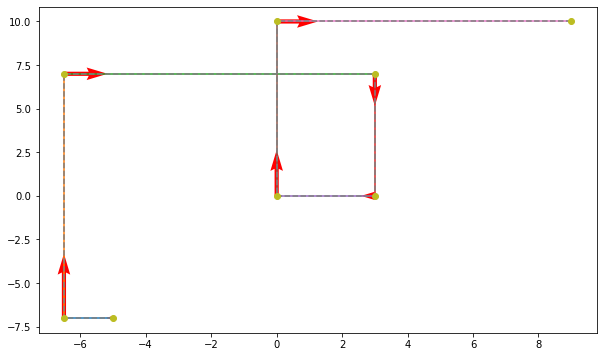

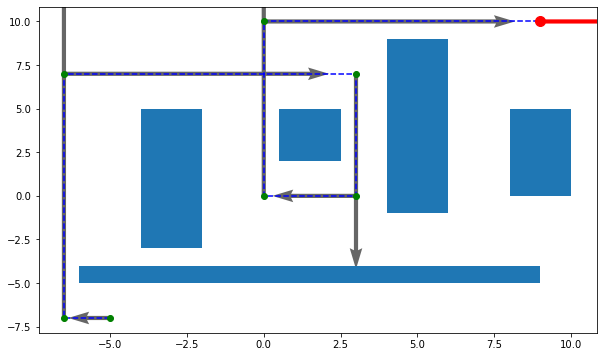

In [18]:
# Compute the straight-line trajectory that passes through the desired waypoints
theta_x, theta_y, dx, dy = line2D(X, Y, Vx, Vy, T)
plot_points()

## Plotting controls
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, animate, frames=int(len(theta_x)/1), interval=25)
HTML(anim.to_jshtml())

In [7]:
# Export the movie to mp4 | Be sure that you have the ffmpeg codec installed (sudo apt-get install ffmpeg).
#anim.save('trajectory2.mp4', dpi=300)